<a href="https://colab.research.google.com/github/Gongsoo/Python3/blob/main/CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [2]:
#packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from google.colab import files
import PIL
import shutil
import zipfile
import glob
import os
import time

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor()]
)
train = datasets.CIFAR10(root='/gdrive/MyDrive/CIFAR10', train = True, download = 'True', transform=transform)
test = datasets.CIFAR10(root='/gdrive/MyDrive/CIFAR10', train = False, download = 'True', transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
def view_image(sample,label):
  sample = sample.permute(1,2,0)
  fig, ax = plt.subplots(1)
  ax.axis('off')
  ax.set_title(classes[label])
  ax.imshow(sample)
  plt.show()

In [6]:
def calculate_norm(dataset):
    # dataset의 axis=1, 2에 대한 평균 산출
    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 평균 산출
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    # dataset의 axis=1, 2에 대한 표준편차 산출
    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 표준편차 산출
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()
    
    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

In [7]:
mean_train, std_train = calculate_norm(train)

In [ ]:
print(mean_train,std_train)

(0.49139965, 0.48215845, 0.4465309) (0.20220213, 0.19931543, 0.20086348)


In [8]:
transform_pre = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean_train,std_train)]
)
train = datasets.CIFAR10(root='/gdrive/MyDrive/CIFAR10', train = True, download = 'False', transform=transform)
test = datasets.CIFAR10(root='/gdrive/MyDrive/CIFAR10', train = False, download = 'False', transform=transform)

Files already downloaded and verified
Files already downloaded and verified


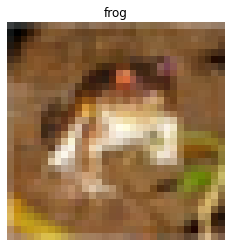

In [11]:
view_image(train[0][0],train[0][1])

In [10]:
batch_size = 32
train_data_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle = True)
test_data_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle = True)

In [ ]:
class CNN(nn.module) :
  def __init__(self) :
    super().__init__()
    self.features = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels = 64, stride = 1, padding = 1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels = 256, stride = 1, padding = 1),
      nn.BatchNorm2d(256),
      nn.ReLU(),
      nn.MaxPool2d(2,2),
      nn.Conv2d(in_channels=256, out_channels = 512, stride = 1, padding = 1),
      nn.BatchNorm2d(512),
      nn.ReLU(),
      nn.Conv2d(in_channels=512, out_channels = 256, stride = 1, padding = 1),
      nn.BatchNorm2d(256),
      nn.ReLU(),
      nn.AvgPool2d(2,2)
    )
    self.classifier = nn.Sequential(
      nn.Linear(256*2*2,4096),
      nn.Linear(4096,2048),
      nn.Linear(2048,10),
      nn.SoftMax(10)

    )

  def forward(self, x) :
    x = self.features(x)
    x = self.flatten(x,1)
    x = self.classifier(x)
